# fitting monte carlo results to birth death rates from the full simulation
Tim Tyree<br>
3.30.2021

In [1]:
from lib.my_initialization import *
import random,scipy
from scipy import stats

In [2]:
#load birth death rates from the full model
data_folder=f'{nb_dir}/data'
os.chdir(data_folder)

data_fk_fn='full_results/data_fig4_vidmar_fk_tt.csv'
data_lr_fn='full_results/data_fig4_vidmar_lr_tt.csv'

fk=pd.read_csv(data_fk_fn)
fk['N']=fk['No2']*2
fk['q']=fk['N']/fk['A'] #number of tips per square centimeter
fk['w']=fk['rate']/fk['A'] #[Hz?]/cm^2

lr=pd.read_csv(data_lr_fn)
lr['N']=lr['No2']*2
lr['q']=lr['N']/lr['A'] #number of tips per square centimeter
lr['w']=lr['rate']/lr['A'] #[Hz?]/cm^2

#load osg data
data_mc_fn='osg_output/run_1_merged.csv'
df=pd.read_csv(data_mc_fn)
df.drop(columns=['dt'],inplace=True)

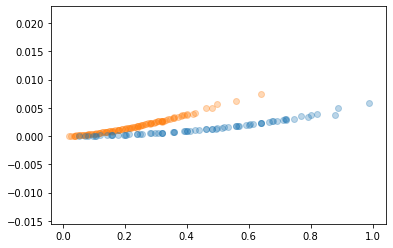

In [9]:
#TODO: plot up WJ's results
plt.scatter(x=lr.q.values,y=lr.w.values,alpha=0.3,c='C1')
plt.scatter(x=fk.q.values,y=fk.w.values,alpha=0.3,c='C0')

In [64]:
def GetPlotUnivCurve(r,D,kappa,ax):
    for L in L_values:
        #get slice
        query=(df.r==r)&(df.D==D)&(df.L==L)&(df.kappa==kappa)
        dff=df[query].copy().drop(columns=['r','D','L','kappa'])
        #compute x,y values
        A=L**2
        dfd=dff.describe().T.drop(columns=['count'])
        y_values=1/dfd['mean'].values.copy()/A
        dfd.reset_index(inplace=True,drop=True)
        dfd['N']=dfd.index.values+11
        x_values=dfd.N.values/A
        #plot x,y values
        ax.scatter(x_values,y_values,s=10,label=f'{A:.2f}'+r' $(cm^{-2})$')
    ax.set_xlabel(r'number density (cm$^{-2}$)', fontsize=fontsize)
    ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=0)
    ax.legend(fontsize=fontsize-6,ncol=2)
    ax.set_title(f'r={r} cm, D={D} '+r'cm$^{-2}$, $\kappa=$'+f'{kappa} Hz', fontsize=fontsize)
#     if not saving:
#         plt.show()
#     else:
#         plt.tight_layout()
#         os.chdir(savefig_folder)
#         plt.savefig(savefig_fn, dpi=300)
# #         print(f"saved figure in \n\t{savefig_fn}")
#         plt.close()
    return True

In [65]:
# the set of all inputs
r_values=np.array([0.1,0.2,0.3,0.4,0.5,1.0])#cm
D_values=np.array([0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0])#cm^2/s
A_values=np.array([20.25,25,39,50,56.25,100,156.25,189])[::-1]#cm^2
L_values=np.sqrt(A_values)#cm
kappa_values=np.array([1,10,100])#1/s
print(L_values)

[13.74772708 12.5        10.          7.5         7.07106781  6.244998
  5.          4.5       ]


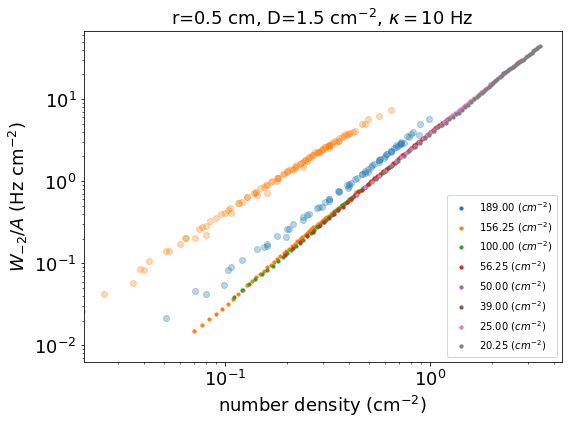

In [76]:
#one test case
r=.5;D=1.5;kappa=10;yscale=10**3

#plot the values
figsize=(8,6)
fontsize=18
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'model_comparison_r_{r}_D_{D}_k_{kappa}.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]


#plot up results from simple monte carlo simulation
retval=GetPlotUnivCurve(r,D,kappa,ax)
ax.legend(loc='lower right')
#plot up results from full simulation
ax.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,c='C1')
ax.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,c='C0')
# ax.set_xlim([0,1])
# ax.set_ylim([0,1])

ax.set_yscale('log')
ax.set_xscale('log')

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#         plt.close()

__Results__: 
- There apppears to be no dependence on A_{domain} or D_{spiral tips} 

In [72]:
#aggregate x,y values over A
def agg_over_A(r,D,kappa):
    for L in L_values:
        #get slice
        query=(df.r==r)&(df.D==D)&(df.L==L)&(df.kappa==kappa)
        dff=df[query].copy().drop(columns=['r','D','L','kappa'])
        #compute x,y values
        A=L**2
        dfd=dff.describe().T.drop(columns=['count'])
        y_values=1/dfd['mean'].values.copy()/A
        dfd.reset_index(inplace=True,drop=True)
        dfd['N']=dfd.index.values+11
        x_values=dfd.N.values/A
    return x_values,y_values

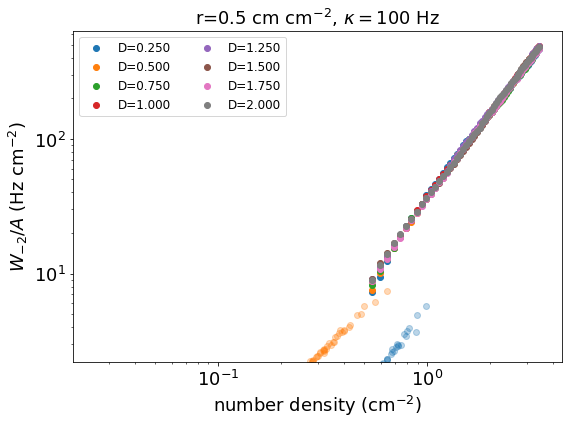

In [121]:
#plot over D
r=0.5;kappa=100;yscale=10**3

#plot the values
figsize=(8,6)
fontsize=18
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'model_comparison_r_{r}_k_{kappa}.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]


for D in D_values:
    x_values,y_values=agg_over_A(r,D,kappa)
    #plot x,y values
    plt.scatter(x_values,y_values,label=f"D={D:.3f}")

    
ax.legend(loc='lower right')
#plot up results from full simulation
ax.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,c='C1')
ax.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,c='C0')
# ax.set_xlim([0,1])
# ax.set_ylim([0,1])

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'number density (cm$^{-2}$)', fontsize=fontsize)
ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.legend(fontsize=fontsize-6,ncol=2)
ax.set_title(f'r={r} cm '+r'cm$^{-2}$, $\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#         plt.close()

KeyboardInterrupt: 

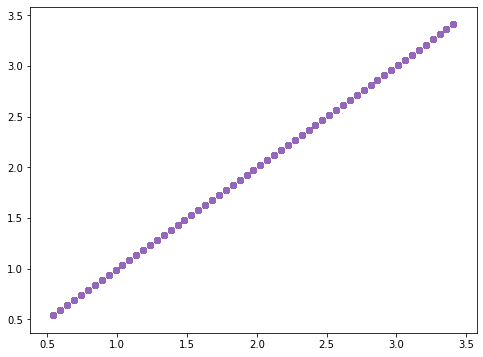

In [115]:
#plot over r holding kappa fixed
r=0.2;
kappa=10;yscale=10**3

#plot the values
figsize=(8,6)
fontsize=18
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'model_comparison_k_{kappa}.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

# for kappa in kappa_values:
for r in r_values:
    xvl=[];yvl=[];
    #aggregate over D
    for D in D_values:
        x_values,y_values=agg_over_A(r,D,kappa)
        xvl.append(x_values)
        yvl.append(y_values)
    x_values=np.concatenate(xvl)
    y_values=np.concatenate(xvl)
    #plot x,y values
    plt.scatter(x_values,y_values,label=f"r={r:.3f}")

    
ax.legend(loc='lower right')
#plot up results from full simulation
ax.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,c='C1')
ax.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,c='C0')
# ax.set_xlim([0,1])
# ax.set_ylim([0,1])

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'number density (cm$^{-2}$)', fontsize=fontsize)
ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.legend(fontsize=fontsize-6,ncol=2)
ax.set_title(f'r={r} cm '+r'cm$^{-2}$, $\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#         plt.close()

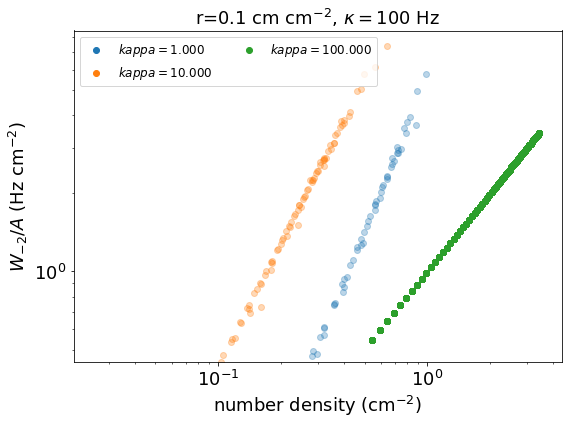

In [95]:
#plot over kappa holding r fixed
r=0.1;
# kappa=100;
yscale=10**3

#plot the values
figsize=(8,6)
fontsize=18
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'model_comparison_r_{r}.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

for kappa in kappa_values:
    xvl=[];yvl=[];
    #aggregate over D
    for D in D_values:
        x_values,y_values=agg_over_A(r,D,kappa)
        xvl.append(x_values)
        yvl.append(y_values)
    x_values=np.concatenate(xvl)
    y_values=np.concatenate(xvl)
    #plot x,y values
    plt.scatter(x_values,y_values,label=r"$kappa=$"+f"{kappa:.3f}")

    
ax.legend(loc='lower right')
#plot up results from full simulation
ax.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,c='C1')
ax.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,c='C0')
# ax.set_xlim([0,1])
# ax.set_ylim([0,1])

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'number density (cm$^{-2}$)', fontsize=fontsize)
ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.legend(fontsize=fontsize-6,ncol=2)
ax.set_title(f'r={r} cm '+r'cm$^{-2}$, $\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#         plt.close()

# compute w versus q and find r,kappa with smalles RMSE_lr,fk

In [86]:
#get df into the right schema
# the set of all inputs
r_values=np.array([0.1,0.2,0.3,0.4,0.5,1.0])#cm
D_values=np.array([0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0])#cm^2/s
A_values=np.array([20.25,25,39,50,56.25,100,156.25,189])[::-1]#cm^2
L_values=np.sqrt(A_values)#cm
kappa_values=np.array([1,10,100])#1/s

#iterate over settings, counting the number of trials
count=0
dg_lst=[]
for r in r_values:
    for D in D_values:
        for kappa in kappa_values:
            count=count+1
            xv,yv=agg_over_A(r,D,kappa)
            dg = pd.DataFrame({'q':xv,'w':yv})
            dg['r']=r
            dg['D']=D
            dg['kappa']=kappa
            dg_lst.append(dg)
print(count)

144


In [87]:
# def routine(item):
#     r,D,kappa=item
#     return PlotUnivCurve(r,D,kappa)

# #run plotting in parallel
# b = db.from_sequence(queue, npartitions=9).map(routine)
# start = time.time()
# retval = list(b)
# print(f"run time was {time.time()-start:.2f} seconds.")
# beep(10)

In [89]:
dg=pd.concat(dg_lst)
dg.head()

,q,w,r,D,kappa
0,0.543210,0.005111,0.1,0.25,1
1,0.592593,0.005977,0.1,0.25,1
2,0.641975,0.007022,0.1,0.25,1
3,0.691358,0.007953,0.1,0.25,1
4,0.740741,0.009025,0.1,0.25,1


In [122]:
#compute w_lr and w_fk using a linear regression of a log-log plot
from lib.compute_slope import *
x=lr.q.values
y=yscale*lr.w.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
dict_lr=dict_out.copy()
#predict the values functionally over all q
m=dict_out['m'];b=dict_out['b']
q_foo = lambda q: m*q+b
dg['w_lr']=np.exp(q_foo(np.log(dg['q'])))

x=fk.q.values
y=yscale*fk.w.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
dict_fk=dict_out.copy()
#predict the values functionally over all q
m=dict_out['m'];b=dict_out['b']
q_foo = lambda q: m*q+b
dg['w_fk']=np.exp(q_foo(np.log(dg['q'])))

In [123]:
#compute the square errors 
dg['se_w_fk']=(dg['w']-dg['w_fk'])**2
dg['se_w_lr']=(dg['w']-dg['w_lr'])**2


In [124]:
#compute the root mean squared errors over various axes
kappa_lst=[];r_lst=[];rmse_lr_lst=[];rmse_fk_lst=[];
for r in r_values:
    for kappa in kappa_values:
#         print(f"for r={r}, kappa={kappa},")
        query=(dg.r==r)&(dg.kappa==kappa)
        qu=dg[query]
        rmse_lr=np.sqrt(qu.se_w_lr.mean())
        rmse_fk=np.sqrt(qu.se_w_fk.mean())
#         print(f"\tRMSE = {rmse_lr:.6f} (LR) and RMSE = {rmse_fk:.6f} (FK)")
        r_lst.append(r)
        kappa_lst.append(kappa)
        rmse_lr_lst.append(rmse_lr)
        rmse_fk_lst.append(rmse_fk)

In [125]:
dh=pd.DataFrame({
    'r':r_lst,
    'kappa':kappa_lst,
    'rmse_lr':rmse_lr_lst,
    'rmse_fk':rmse_fk_lst,
    
})

In [141]:
#and the top 5 matches for either model is... (FK)
print(f"The top 5 for the Fenton-Karma model:")
dh.sort_values(by='rmse_fk').head()

The top 5 for the Fenton-Karma model:


,r,kappa,rmse_lr,rmse_fk
13,0.5,10,47.193024,4.176082
5,0.2,100,36.304218,7.447263
10,0.4,10,55.231042,12.188330
15,1.0,1,60.536369,17.513745
7,0.3,10,61.629974,18.605445


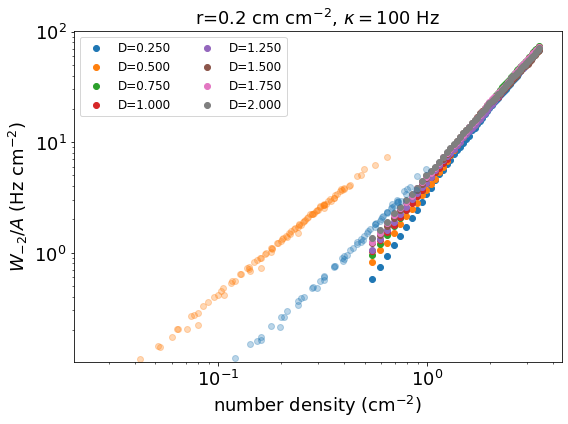

In [130]:
#plot over D
# r=0.5;kappa=10;
r=0.2;kappa=100;
yscale=10**3

#plot the values
figsize=(8,6)
fontsize=18
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'model_comparison_r_{r}_k_{kappa}.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]


for D in D_values:
    x_values,y_values=agg_over_A(r,D,kappa)
    #plot x,y values
    plt.scatter(x_values,y_values,label=f"D={D:.2f}")

    
ax.legend(loc='lower right')
#plot up results from full simulation
ax.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,c='C1')
ax.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,c='C0')
# ax.set_xlim([0,1])
# ax.set_ylim([0,1])

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'number density (cm$^{-2}$)', fontsize=fontsize)
ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.legend(fontsize=fontsize-6,ncol=2)
ax.set_title(f'r={r} cm '+r'cm$^{-2}$, $\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#         plt.close()

In [140]:
#and the top 5 matches for either model is... (LR)
print(f"The top 5 for the Luo-Rudy model:")
dh.sort_values(by='rmse_lr').head()

The top 5 for the Luo-Rudy model:


,r,kappa,rmse_lr,rmse_fk
8,0.3,100,12.873114,53.369668
16,1.0,10,22.853284,65.016817
5,0.2,100,36.304218,7.447263
13,0.5,10,47.193024,4.176082
10,0.4,10,55.231042,12.188330


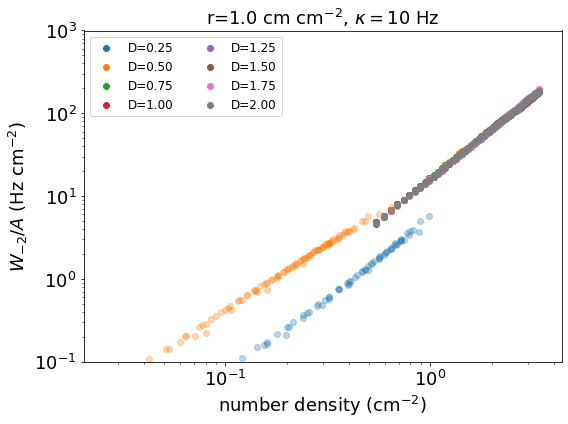

In [138]:
#plot over D
# r=0.3;kappa=100;
r=1.0;kappa=10;
yscale=10**3

#plot the values
figsize=(8,6)
fontsize=18
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'model_comparison_r_{r}_k_{kappa}.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]


for D in D_values:
    x_values,y_values=agg_over_A(r,D,kappa)
    #plot x,y values
    plt.scatter(x_values,y_values,label=f"D={D:.2f}")

    
ax.legend(loc='lower right')
#plot up results from full simulation
ax.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,c='C1')
ax.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,c='C0')
# ax.set_xlim([0,1])
ax.set_ylim([0.1,10**3])

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'number density (cm$^{-2}$)', fontsize=fontsize)
ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.legend(fontsize=fontsize-6,ncol=2)
ax.set_title(f'r={r} cm '+r'cm$^{-2}$, $\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#         plt.close()

In [139]:
#try some root finding for mse_fk,lr(r,k) for D = 2.0 fixed
#compute the root mean squared errors over various axes
kappa_lst=[];r_lst=[];rmse_lr_lst=[];rmse_fk_lst=[];
for r in r_values:
    for kappa in kappa_values:
#         print(f"for r={r}, kappa={kappa},")
        query=(dg.r==r)&(dg.kappa==kappa)&(dg.D==2.0)
        qu=dg[query]
        rmse_lr=np.sqrt(qu.se_w_lr.mean())
        rmse_fk=np.sqrt(qu.se_w_fk.mean())
#         print(f"\tRMSE = {rmse_lr:.6f} (LR) and RMSE = {rmse_fk:.6f} (FK)")
        r_lst.append(r)
        kappa_lst.append(kappa)
        rmse_lr_lst.append(rmse_lr)
        rmse_fk_lst.append(rmse_fk)

In [ ]:
#TODO: dress up the results as a .odg slide for tomorrow!
#TODO: include a slide on uncertainty. include log-normal distribution to bootstrap results and to stopping time disrib.


